# **Healthcare**

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
dataset = pd.read_csv('health care diabetes.csv')

### Checking dataset structure

In [ ]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### Setting features and label

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Data Exploration

Checking the first `2` rows of dataset

In [ ]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Checking concise summary of a DataFrame

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking lebels of dataset

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Checking data types in datafram

In [ ]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Checking descriptive statistics

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Computing pairwise correlation of columns, excluding NA/null values

In [ ]:
dataset.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Checking datatype for preape to make count frequency plot

In [ ]:
dataset.dtypes.value_counts()

int64      7
float64    2
dtype: int64

Checking the balance of the data by count of outcomes by their values

In [ ]:
dataset.Outcome.value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Data Visualization

Ploting count frequency plot for describing the data types and the count of variables

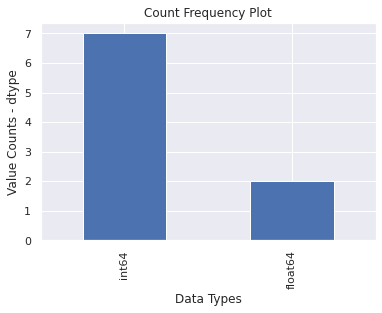

In [ ]:
datatyp = dataset.dtypes.value_counts()
datatyp.plot.bar()
plt.title('Count Frequency Plot')
plt.xlabel('Data Types')
plt.ylabel('Value Counts - dtype')
plt.show()

Ploting the count frequency plot for describing the 'Outcome' values

Findings :
1.   65% Patients are non Diabetes and 35 % Patients are Diabetes




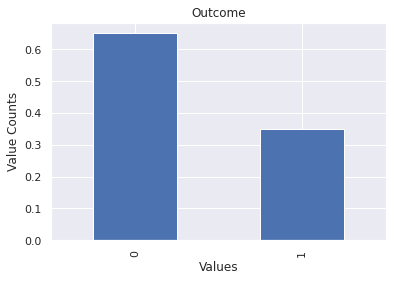

In [ ]:
outcome_value = dataset.Outcome.value_counts(normalize = True)
outcome_value.plot.bar()
plt.title('Outcome')
plt.xlabel('Values')
plt.ylabel('Value Counts')
plt.show()

Ploting histogram to see distribution of variables with unchanged data

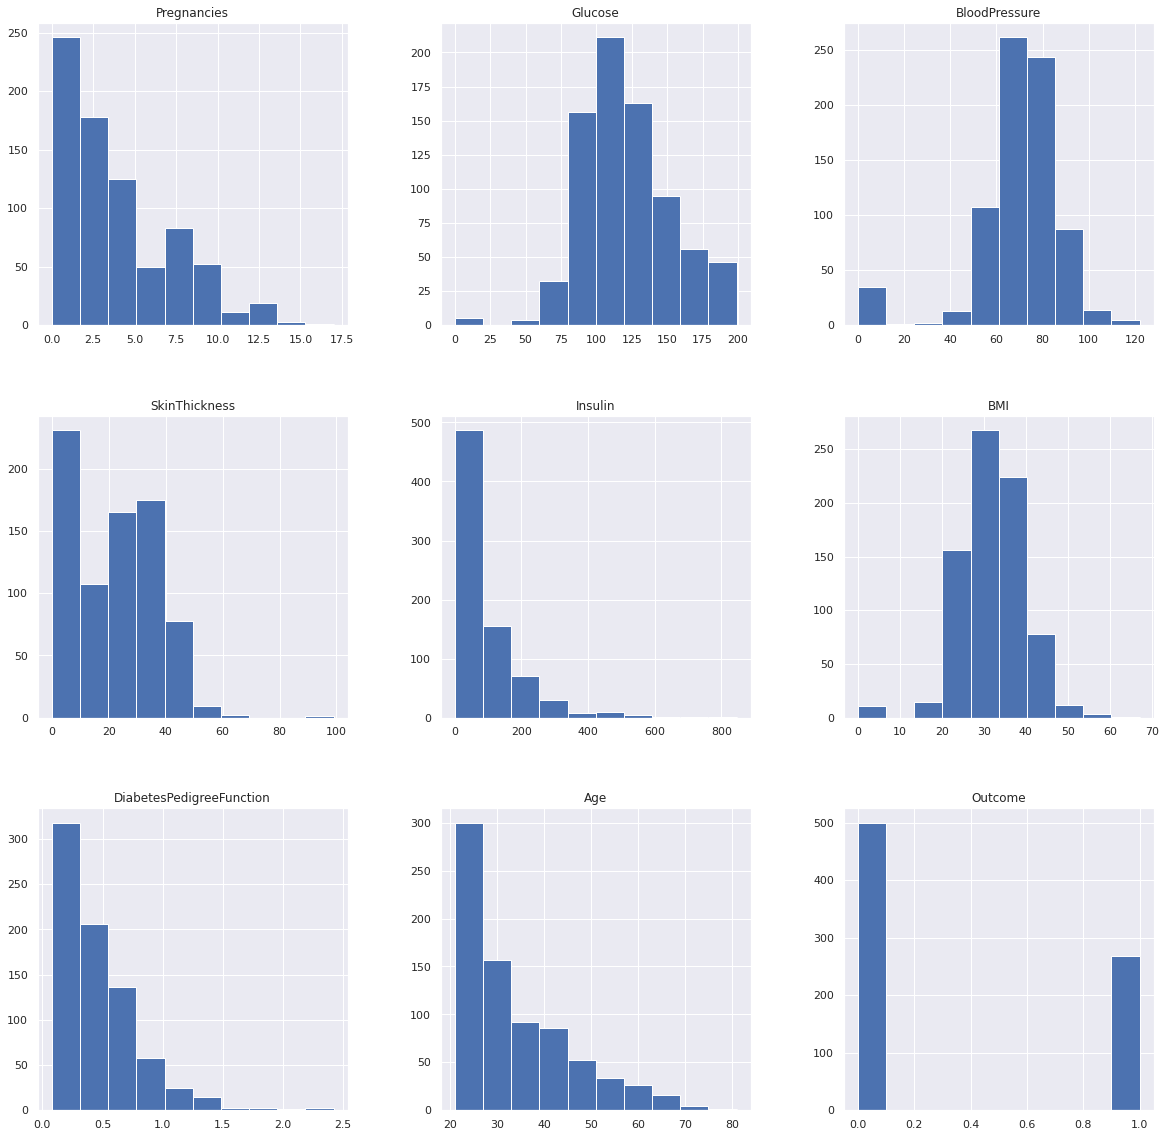

In [ ]:
histogram = dataset.hist(figsize = (20, 20))

Checking outliers present in dataset
1.   Insulin having hugh outlier present as '0' which is missing values

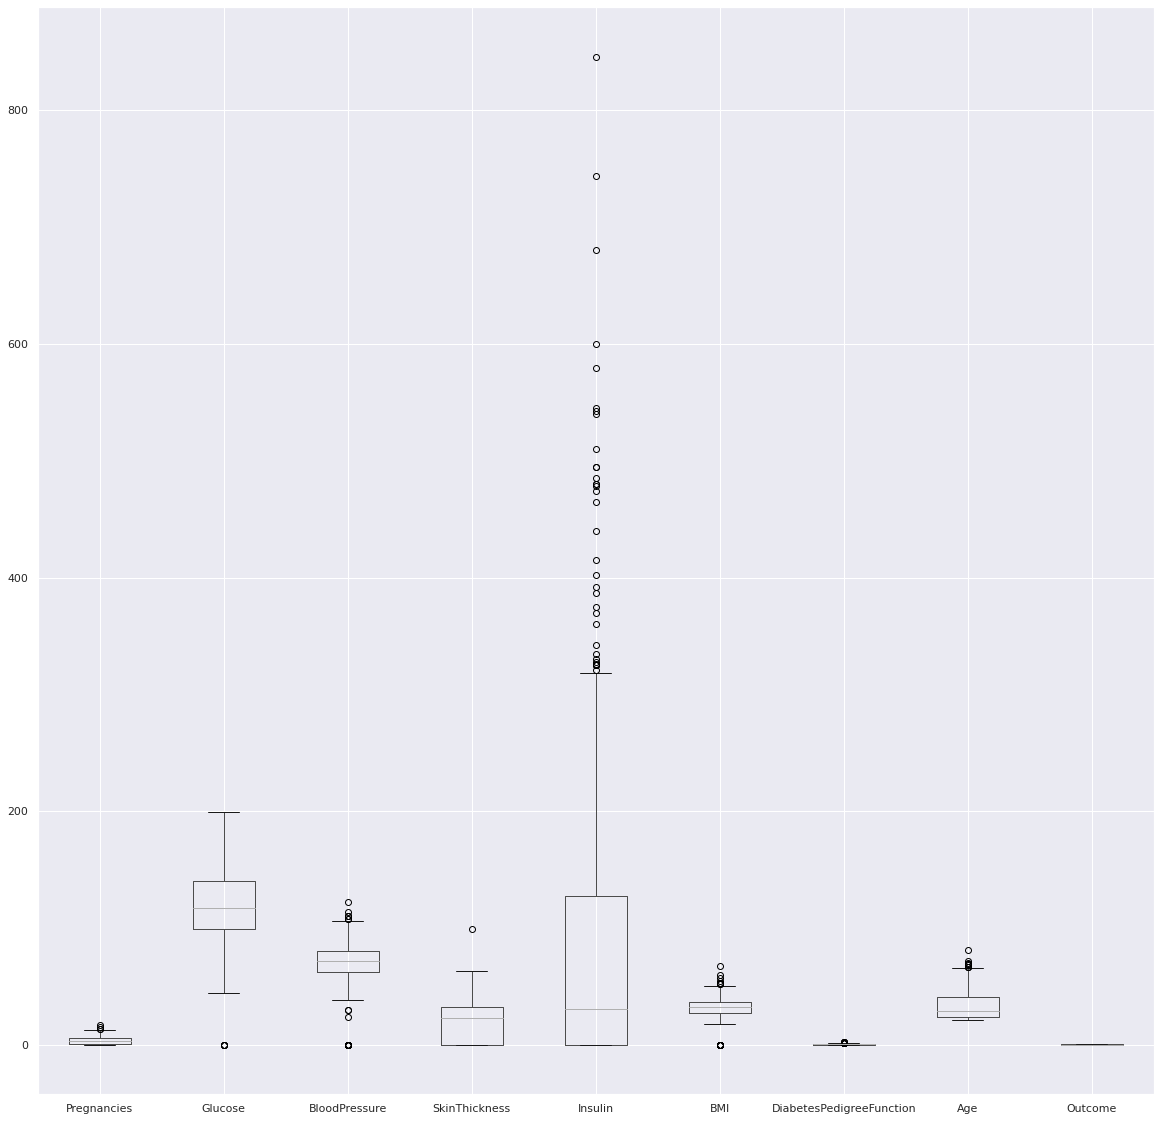

In [ ]:
dataset.boxplot(figsize=(20, 20))

Ploting histogram to see distribution of variables after removing null values


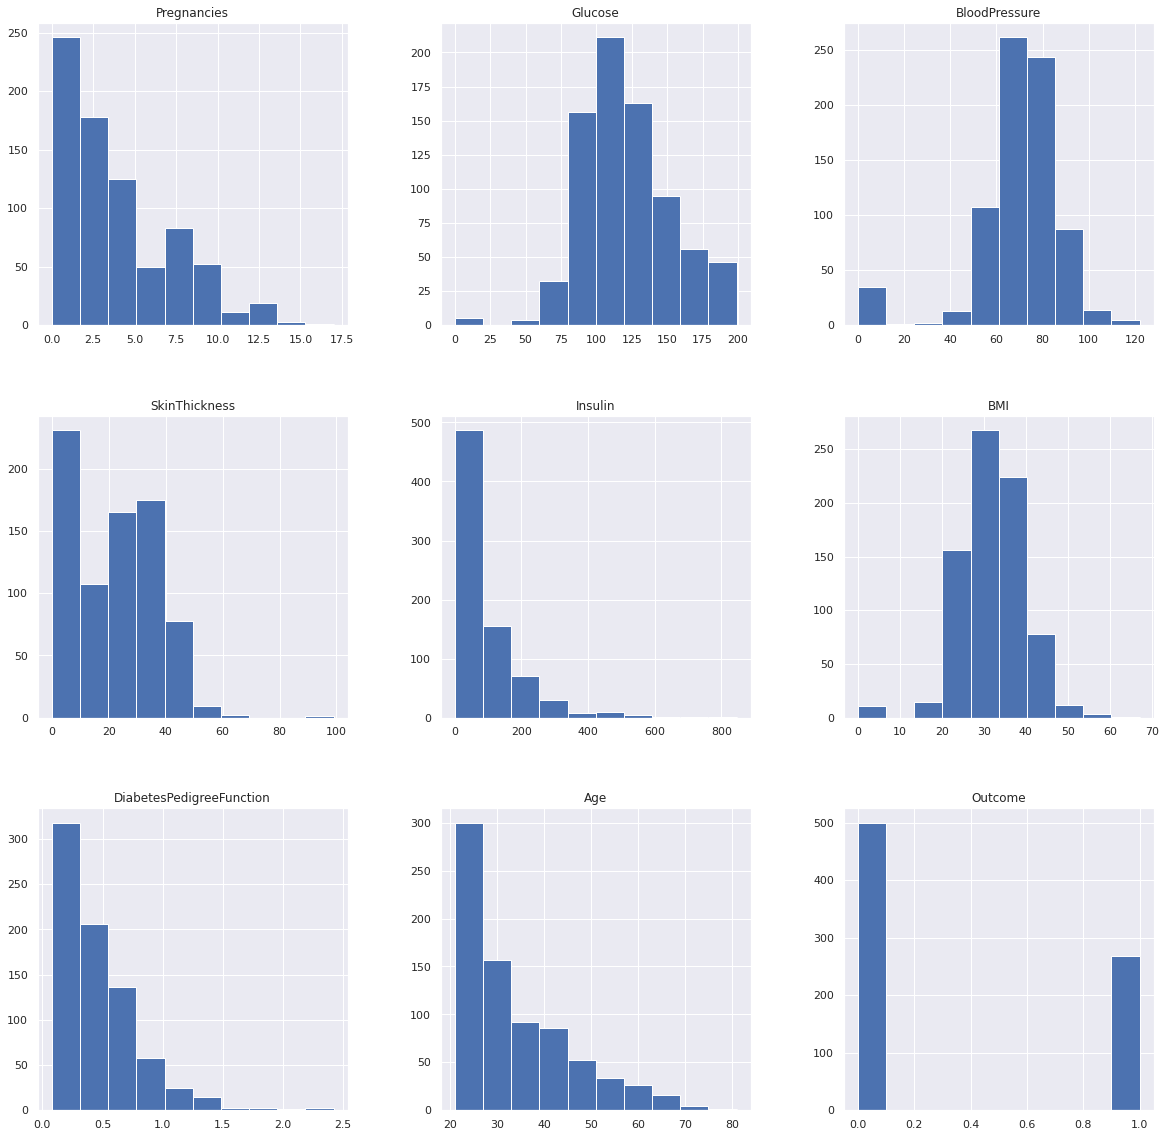

In [ ]:
histogram = dataset.hist(figsize = (20,20))

Ploting scatter charts between the pair of variables to understand the relationships


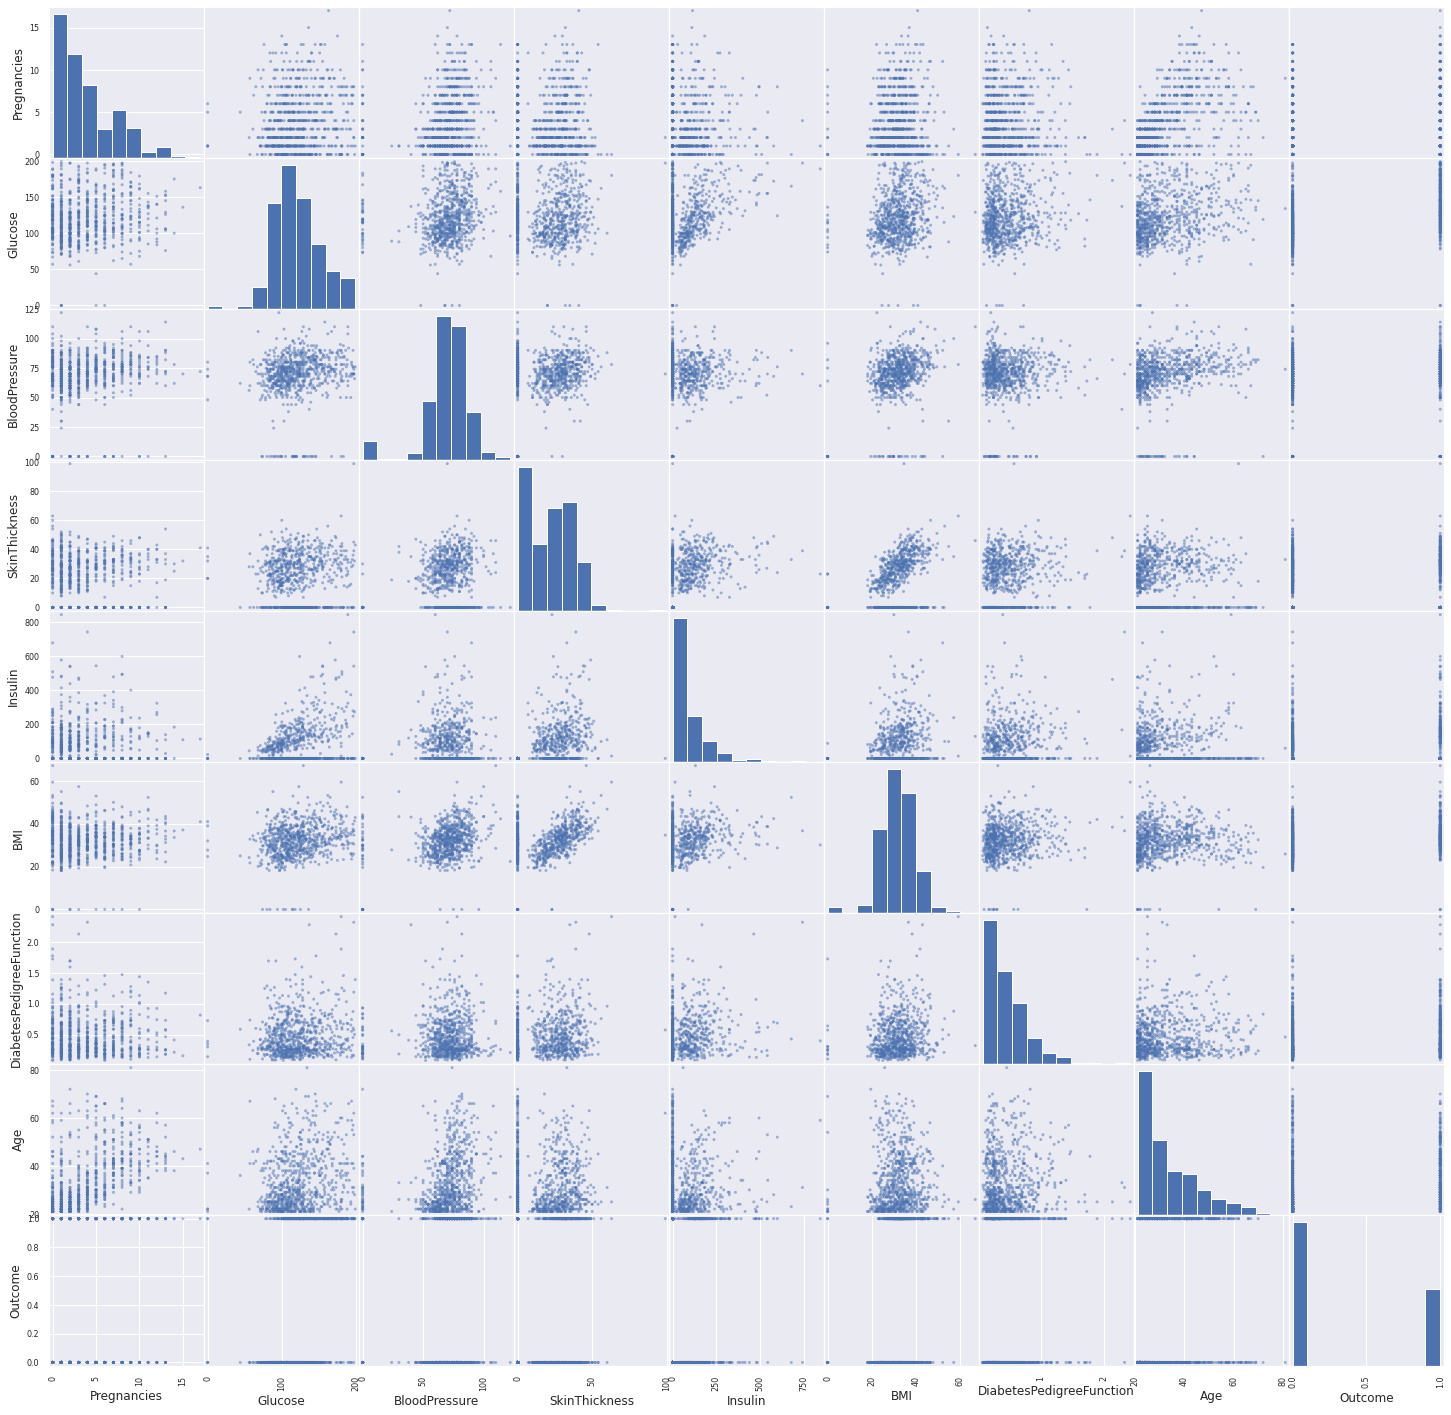

In [ ]:
scatter = scatter_matrix(dataset,figsize=(25, 25))

Ploting scatter charts between the pair of variables to understand the relationships

Findings: 

*   SkinThickness and BMI are highly correlated



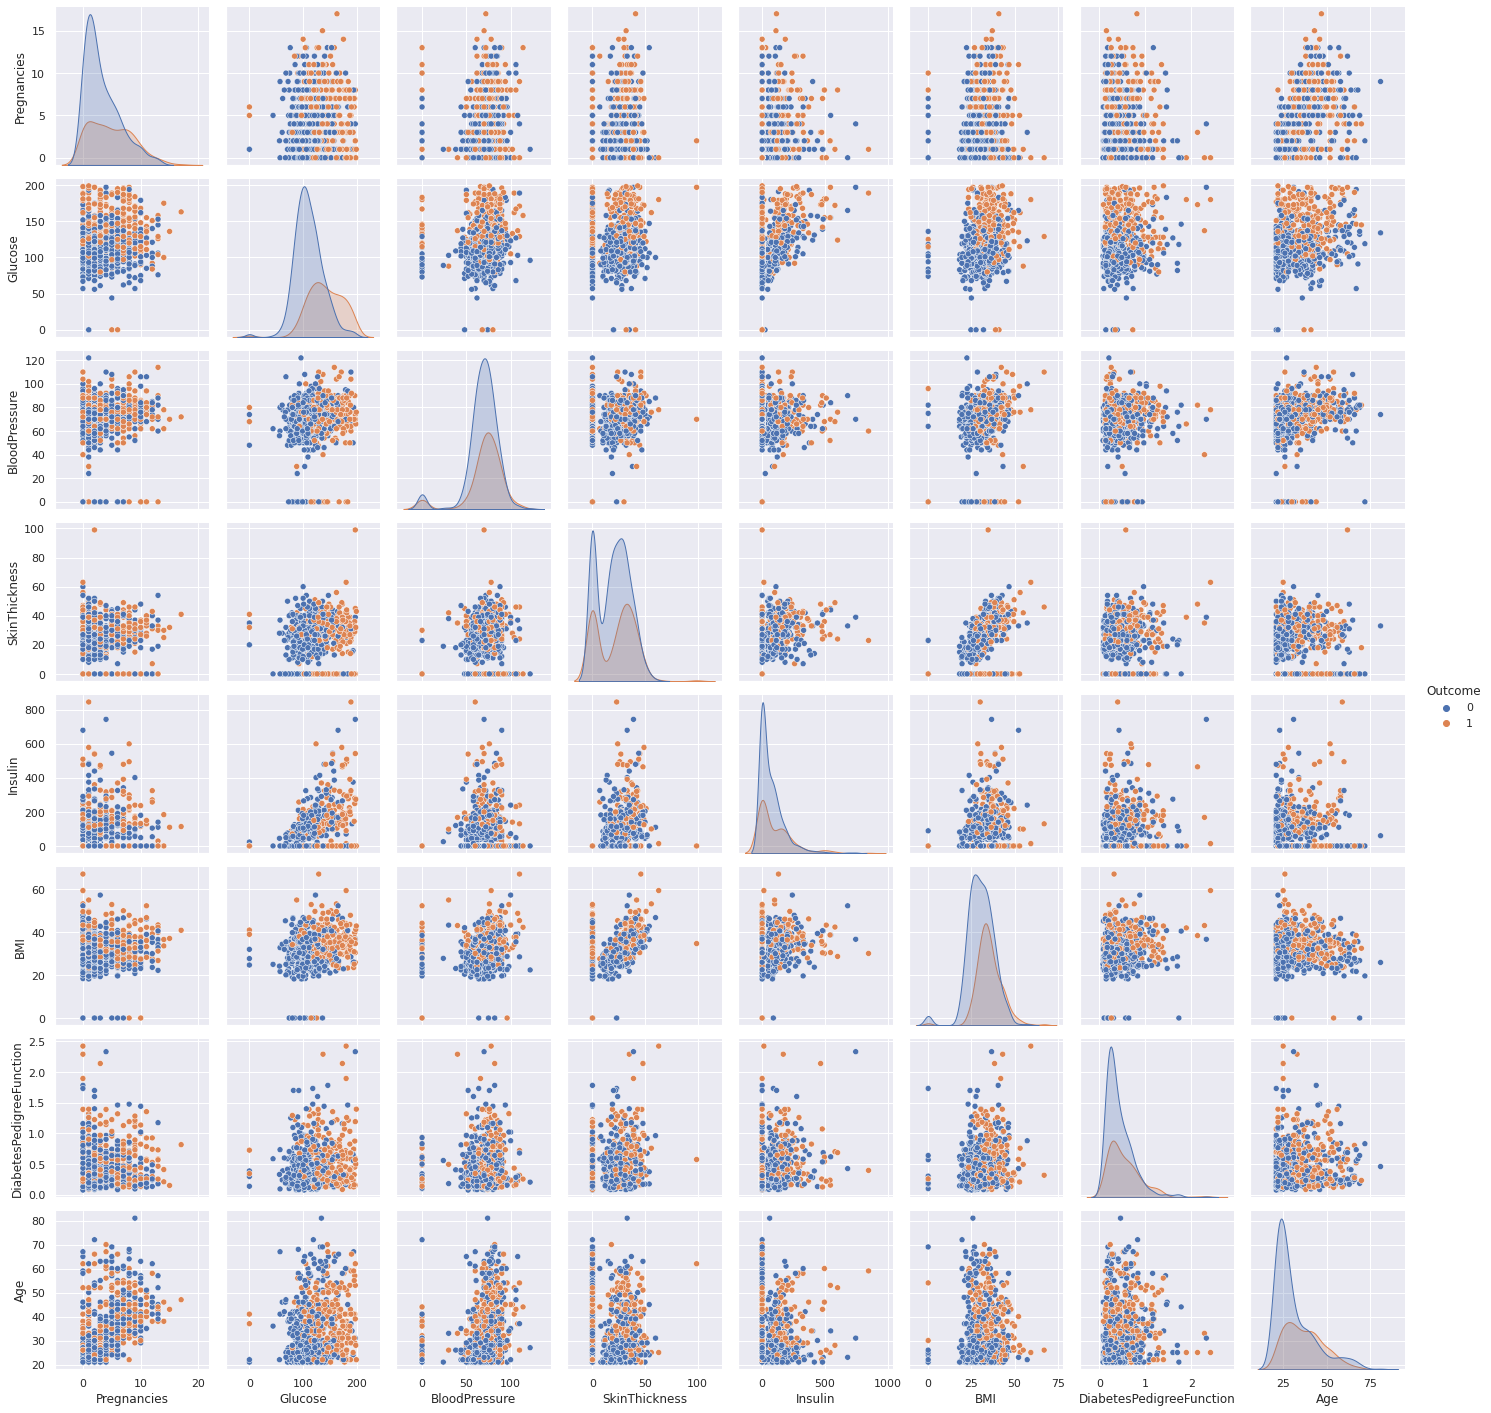

In [ ]:
sns.pairplot(dataset, hue = 'Outcome')

Ploting heatmap for performing correlation analysis

Finding:

1. Value 1 represent the correlation between variables with lighter 

2. Value 0 represent the no correlation between variables with darker color
color


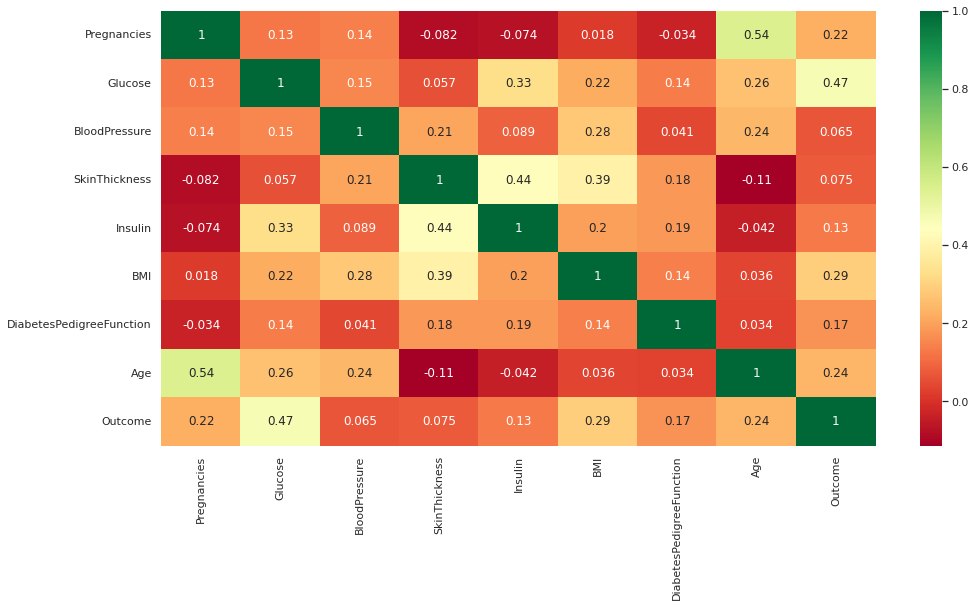

In [ ]:
plt.figure(figsize = (16, 8))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap ='RdYlGn')

Printing X and y as features and target variables

In [ ]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

## Taking care of missing data

### Checking missing values in dataset


In [ ]:
dataset.isnull().values.any()

False

### Checking null values as '0' present in given dataset


In [ ]:
dataset[dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]==0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Percentage of NaN values present in dataset as '0'

In [ ]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
        print(i)
        print(dataset[i].value_counts(normalize = True)[0], '\n')
        
        #print(dataset[i].value_counts(normalize = True).head(), '\n')
        #print(dataset[i].value_counts(normalize = True).to_frame().iloc[0, :], '\n')
        #print(dataset[dataset[value_count()==0].value_counts()]).value_count() 

Glucose
0.006510416666666667 

BloodPressure
0.045572916666666664 

SkinThickness
0.2955729166666667 

Insulin
0.4869791666666667 

BMI
0.014322916666666666 



Findings: 
1.   In given dataset we have null values represented as '0'

Imputing missing values with 'median'

In [ ]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    print(i)
    
    median_values = dataset[dataset[i]!=0][i].median()
    print(median_values,'\n')
    
    dataset[i].replace(0, median_values, inplace = True)

Glucose
117.0 

BloodPressure
72.0 

SkinThickness
29.0 

Insulin
125.0 

BMI
32.3 



In [ ]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


Checking dataset after removing null values


In [ ]:
dataset[dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0


In [ ]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0, stratify = y)

In [ ]:
print(X_train)

[[  7.    196.     90.    ...  39.8     0.451  41.   ]
 [  2.     81.     72.    ...  30.1     0.547  25.   ]
 [  2.    127.     58.    ...  27.7     1.6    25.   ]
 ...
 [  3.     82.     70.    ...  21.1     0.389  25.   ]
 [  7.    103.     66.    ...  39.1     0.344  31.   ]
 [  0.    161.     50.    ...  21.9     0.254  65.   ]]


In [ ]:
print(X_test)

[[2.00e+00 5.60e+01 5.60e+01 ... 2.42e+01 3.32e-01 2.20e+01]
 [1.00e+00 9.20e+01 6.20e+01 ... 1.95e+01 4.82e-01 2.50e+01]
 [1.00e+00 1.00e+02 7.40e+01 ... 1.95e+01 1.49e-01 2.80e+01]
 ...
 [5.00e+00 1.66e+02 7.60e+01 ... 4.57e+01 3.40e-01 2.70e+01]
 [1.00e+00 1.06e+02 7.00e+01 ... 3.42e+01 1.42e-01 2.20e+01]
 [2.00e+00 1.12e+02 6.80e+01 ... 3.41e+01 3.15e-01 2.60e+01]]


In [ ]:
print(y_train)

[1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 

In [ ]:
print(y_test)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 0 0 1 0 0]


## Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 7.00000000e+00  2.36205262e+00  1.05918965e+00 ...  1.01966869e+00
   4.51000000e-01  4.10000000e+01]
 [ 2.00000000e+00 -1.24433342e+00  1.27466950e-01 ... -2.40277946e-01
   5.47000000e-01  2.50000000e+01]
 [ 2.00000000e+00  1.98220992e-01 -5.97206265e-01 ... -5.52017321e-01
   1.60000000e+00  2.50000000e+01]
 ...
 [ 3.00000000e+00 -1.21297355e+00  2.39422049e-02 ... -1.40930060e+00
   3.89000000e-01  2.50000000e+01]
 [ 7.00000000e+00 -5.54416095e-01 -1.83107285e-01 ...  9.28744709e-01
   3.44000000e-01  3.10000000e+01]
 [ 0.00000000e+00  1.26445686e+00 -1.01130525e+00 ... -1.30538748e+00
   2.54000000e-01  6.50000000e+01]]


In [ ]:
print(X_test)

[[ 2.00000000e+00 -2.02833039e+00 -7.00731010e-01 ... -1.00663724e+00
   3.32000000e-01  2.20000000e+01]
 [ 1.00000000e+00 -8.99374760e-01 -3.90156775e-01 ... -1.61712685e+00
   4.82000000e-01  2.50000000e+01]
 [ 1.00000000e+00 -6.48495731e-01  2.30991695e-01 ... -1.61712685e+00
   1.49000000e-01  2.80000000e+01]
 ...
 [ 5.00000000e+00  1.42125626e+00  3.34516440e-01 ...  1.78602799e+00
   3.40000000e-01  2.70000000e+01]
 [ 1.00000000e+00 -4.60336459e-01  2.39422049e-02 ...  2.92276819e-01
   1.42000000e-01  2.20000000e+01]
 [ 2.00000000e+00 -2.72177188e-01 -7.95825401e-02 ...  2.79287678e-01
   3.15000000e-01  2.60000000e+01]]


## Data Modeling

Checking the train and test data

In [ ]:
print(X_train.shape)

(614, 8)


In [ ]:
print(X_test.shape)

(154, 8)


In [ ]:
print(y_train.shape)

(614,)


In [ ]:
print(y_test.shape)

(154,)


## Training the K-NN model on the Training set

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]

### Making the Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[86 14]
 [26 28]]
0.7402597402597403


Ploting confusion matrix display visual

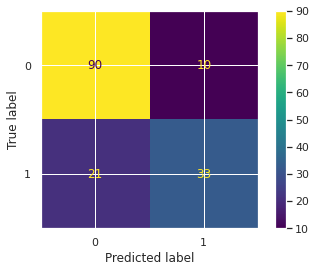

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Check accuracy of model on training data

In [ ]:
classifier.score(X_train, y_train)

0.7882736156351792

### Check accuracy of model on testing data

In [ ]:
classifier.score(X_test, y_test)

0.7402597402597403

### Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



### Plotting pipeline steps

In [ ]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

## Training the Naive Bayes model on the Training set

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Making the Confusion Matrix

In [ ]:
# print(confusion_matrix(y_test, y_pred))
# print(accuracy_score(y_test,y_pred))

Ploting confusion matrix display visual

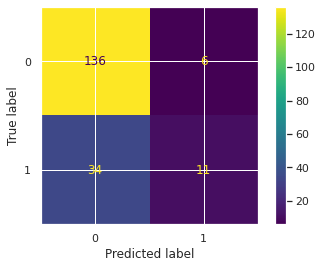

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Check accuracy of model on training data

In [ ]:
classifier.score(X_train, y_train)

0.7629233511586453

### Check accuracy of model on testing data

In [ ]:
classifier.score(X_test, y_test)

0.786096256684492

### Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.96      0.87       142
           2       0.65      0.24      0.35        45

    accuracy                           0.79       187
   macro avg       0.72      0.60      0.61       187
weighted avg       0.76      0.79      0.75       187



### Plotting pipeline steps

In [ ]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), GaussianNB())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

## Training the Random Forest Classification model on the Training set

In [ ]:
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0,)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

### Making the Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[130  13]
 [ 40   4]]
0.7165775401069518


Ploting confusion matrix display visual

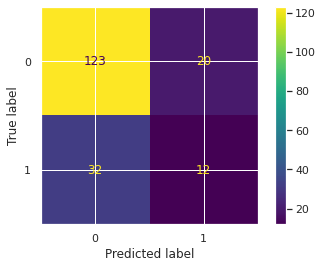

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Check accuracy of model on training data

In [ ]:
classifier.score(X_test, y_test)

0.7219251336898396

### Check accuracy of model on testing data

In [ ]:
classifier.score(X_test, y_test)

0.7219251336898396

### Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.86      0.83       143
           2       0.38      0.27      0.32        44

    accuracy                           0.72       187
   macro avg       0.58      0.57      0.57       187
weighted avg       0.70      0.72      0.71       187



### Plotting pipeline steps

In [ ]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=10,
                                        random_state=0))])

## Training the SVM model on the Training set

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Making the Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[119  24]
 [ 36   8]]
0.679144385026738


Ploting confusion matrix display visual

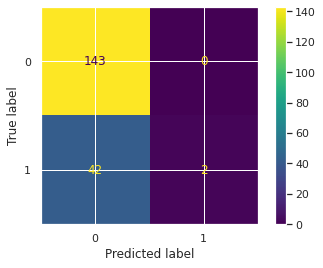

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Check accuracy of model on training data

In [ ]:
classifier.score(X_test, y_test)

0.7754010695187166

### Check accuracy of model on testing data

In [ ]:
classifier.score(X_test, y_test)

0.7754010695187166

### Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87       143
           2       1.00      0.05      0.09        44

    accuracy                           0.78       187
   macro avg       0.89      0.52      0.48       187
weighted avg       0.83      0.78      0.69       187



### Plotting pipeline steps

In [ ]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear', random_state = 0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=0))])

## Training the Logistic Regression model on the Training set

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Making the Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[90 10]
 [21 33]]
0.7987012987012987


Ploting confusion matrix display visual

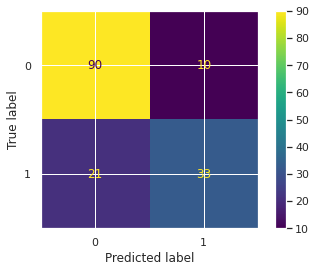

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Check accuracy of model on training data

In [ ]:
classifier.score(X_test, y_test)

0.7987012987012987

### Check accuracy of model on testing data

In [ ]:
classifier.score(X_test, y_test)

0.7987012987012987

### Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       100
           1       0.77      0.61      0.68        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



### Plotting pipeline steps

In [ ]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state = 0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

## Training XGBoost on the Training set

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

### Making the Confusion Matrix

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[163   1]
 [  8 128]]


0.97

### Ploting confusion matrix display visual

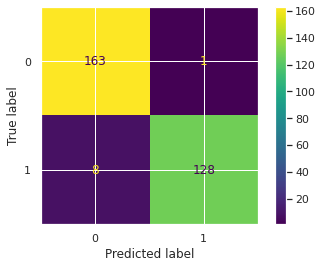

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Applying k-Fold Cross Validation

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.29 %
Standard Deviation: 2.29 %


## Training CatBoost on the Training set

In [ ]:
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.008847
0:	learn: 0.6754537	total: 6.97ms	remaining: 6.96s
1:	learn: 0.6647391	total: 12.9ms	remaining: 6.46s
2:	learn: 0.6477755	total: 19ms	remaining: 6.3s
3:	learn: 0.6336509	total: 24.7ms	remaining: 6.15s
4:	learn: 0.6181298	total: 30.5ms	remaining: 6.08s
5:	learn: 0.6083051	total: 36.8ms	remaining: 6.09s
6:	learn: 0.5964469	total: 42.7ms	remaining: 6.06s
7:	learn: 0.5856739	total: 49.2ms	remaining: 6.1s
8:	learn: 0.5745829	total: 55.5ms	remaining: 6.11s
9:	learn: 0.5641862	total: 61.7ms	remaining: 6.11s
10:	learn: 0.5547426	total: 68ms	remaining: 6.11s
11:	learn: 0.5441845	total: 74.2ms	remaining: 6.11s
12:	learn: 0.5338379	total: 80.6ms	remaining: 6.12s
13:	learn: 0.5228911	total: 86.6ms	remaining: 6.1s
14:	learn: 0.5137442	total: 92.6ms	remaining: 6.08s
15:	learn: 0.5066484	total: 98.7ms	remaining: 6.07s
16:	learn: 0.4950612	total: 105ms	remaining: 6.05s
17:	learn: 0.4848489	total: 111ms	remaining: 6.05s
18:	learn: 0.4754352	total: 117ms	remaining: 6.04s
19

### Making the Confusion Matrix

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[164   0]
 [  8 128]]


0.9733333333333334

### Ploting confusion matrix display visual

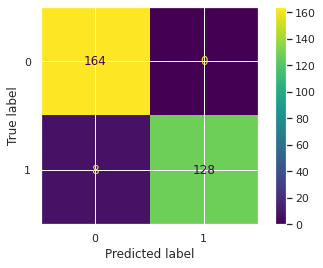

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Applying k-Fold Cross Validation

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6069159	total: 38.9ms	remaining: 5.52s
7:	learn: 0.5966027	total: 44.2ms	remaining: 5.48s
8:	learn: 0.5856913	total: 49.6ms	remaining: 5.46s
9:	learn: 0.5760461	total: 54.8ms	remaining: 5.43s
10:	learn: 0.5672112	total: 60ms	remaining: 5.39s
11:	learn: 0.5568810	total: 65.5ms	remaining: 5.39s
12:	learn: 0.5471381	total: 72.3ms	remaining: 5.49s
13:	learn: 0.5364776	total: 84.6ms	remaining: 5.96s
14:	learn: 0.5257723	total: 90.1ms	remaining: 5.92s
15:	learn: 0.5189652	total: 95.8ms	remaining: 5.89s
16:	learn: 0.5077214	total: 102ms	remaining: 5.87s
17:	learn: 0.4981857	total: 107ms	remaining: 5.86s
18:	learn: 0.4914058	total: 114ms	remaining: 5.87s
19:	learn: 0.4821758	total: 120ms	remaining: 5.86s
20:	learn: 0.4739371	total: 125ms	remaining: 5.85s
21:	learn: 0.4643209	total: 131ms	remaining: 5.84s
22:	learn: 0.4542510	total: 144ms	remaining: 6.1s
23:	learn: 0.4455842	total: 150ms	remaining: 6.09s
24:	learn: 0.4364911	total: 

## ROC and AUC Curves

#### Training SVC model

In [ ]:
X, y = make_classification(random_state=0)
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

### Create a ROC Curve display from an estimator

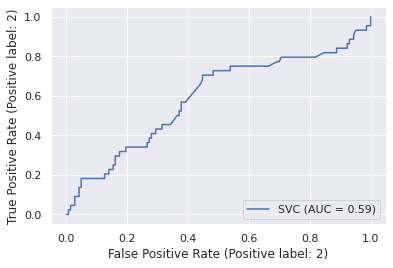

In [ ]:
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

### Plot ROC curve given the true and predicted values

In [ ]:
# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score = (y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score = (y_test, pred_prob2[:,1])

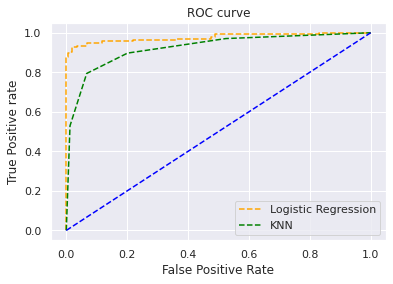

In [ ]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();